In [ ]:
# import libraries to use (pandas, numpy, matplotlib.pyplot and seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing function
path = "Data_Marketing_Customer_Analysis_Round2.csv"
#load original data
def load_original_data(path):
    return pd.read_csv(path)

In [3]:
cs_df = load_original_data(path)

In [9]:
#standardising
def lower_case_column_names(cs_df):
    cs_df.columns = [i.lower() for i in cs_df.columns]
    return cs_df

In [4]:
def rename_columns(cs_df):
    cs_df.rename(columns = {'employmentstatus': 'employment_status'}, inplace = True)
    cs_df.columns = cs_df.columns.str.lower().str.replace(" ", "_")

    return cs_df

In [5]:
def drop_columns(cs_df):
    cs_df.drop(columns = ["unnamed:_0","customer"], inplace = True)
    return cs_df

In [6]:
def dd(cs_df):
    cs_df = cs_df.drop_duplicates().reset_index()
    cs_df.drop(columns = ["index"], inplace = True)
    return cs_df

In [7]:
#Replacing null values
def fill_na(cs_df):
    cs_df['number_of_open_complaints'].fillna(value=cs_df['number_of_open_complaints'].median(),inplace=True)
    cs_df['months_since_last_claim'].fillna(value=cs_df['months_since_last_claim'].mean(),inplace=True)
    cs_df['total_claim_amount'].fillna(value=cs_df['total_claim_amount'].mean(), inplace=True)
    cs_df['income'].fillna(value=cs_df['income'].mean(),inplace=True)
    cs_df['response'].dropna(inplace=True)

    return cs_df

In [10]:
#Pipeline Controler
cs_df = (load_original_data(path)
.pipe(lower_case_column_names)
.pipe(rename_columns)
.pipe(drop_columns)
.pipe(dd)
.pipe(fill_na)
)
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10776 entries, 0 to 10775
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10163 non-null  object 
 1   customer_lifetime_value        10776 non-null  float64
 2   response                       10163 non-null  object 
 3   coverage                       10776 non-null  object 
 4   education                      10776 non-null  object 
 5   effective_to_date              10776 non-null  object 
 6   employment_status              10776 non-null  object 
 7   gender                         10776 non-null  object 
 8   income                         10776 non-null  int64  
 9   location_code                  10776 non-null  object 
 10  marital_status                 10776 non-null  object 
 11  monthly_premium_auto           10776 non-null  int64  
 12  months_since_last_claim        10776 non-null 

In [11]:
cs_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,Washington,14947.917300,No,Basic,Bachelor,2/10/2011,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,Oregon,22332.439460,Yes,Extended,College,1/11/2011,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


##Activity 4

In [12]:
#Show a plot of the total number of responses.

num_responses = cs_df['response'].value_counts()
num_responses

No     8795
Yes    1368
Name: response, dtype: int64

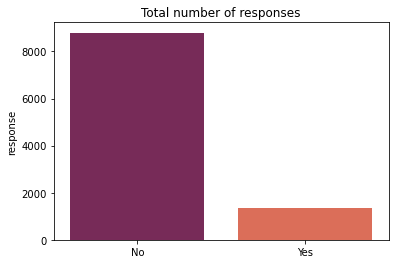

In [33]:
fig, ax = plt.subplots()

ax.set_title("Total number of responses")

sns.barplot(x=num_responses.index, y=num_responses, palette = 'rocket')

plt.show()

In [14]:
#Show response rate by channel

response_rate = cs_df.groupby(['response', 'sales_channel']).size().reset_index(name= 'count')
response_rate

,response,sales_channel,count
0,No,Agent,3142
1,No,Branch,2533
2,No,Call Center,1790
3,No,Web,1330
4,Yes,Agent,694
5,Yes,Branch,307
6,Yes,Call Center,204
7,Yes,Web,163


<AxesSubplot:title={'center':'Response rate by channel'}, xlabel='sales_channel', ylabel='count'>

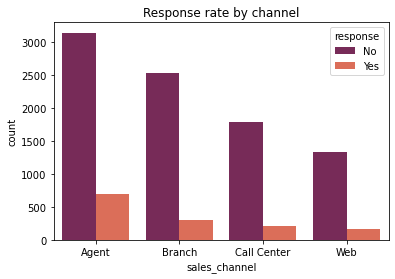

In [15]:
fig, ax = plt.subplots()

ax.set_title("Response rate by channel")

# seaborn barplot
sns.barplot(x = response_rate['sales_channel'], y = response_rate['count'], hue = response_rate['response'], data = cs_df, palette = "rocket")

#hue allows us to easily make subgroups within Seaborn plots

In [16]:
#Show a plot of the response rate by the total claim amount.

total_cl_amount = cs_df.groupby(['response','total_claim_amount']).size().reset_index(name = 'count')
total_cl_amount

,response,total_claim_amount,count
0,No,0.099007,1
1,No,0.382107,2
2,No,0.423310,2
3,No,0.517753,1
4,No,0.769185,1
...,...,...,...
5161,Yes,1261.319869,6
5162,Yes,1294.700423,6
5163,Yes,1300.800000,5
5164,Yes,1324.800000,7


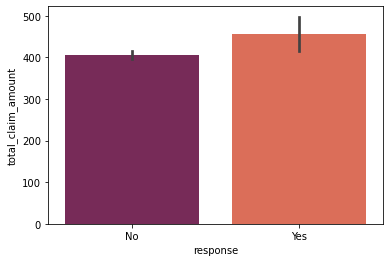

In [32]:
#plot

sns.barplot(x = total_cl_amount['response'], y = total_cl_amount['total_claim_amount'], palette = 'rocket')
plt.show()

In [28]:
#Show a plot of the response rate by income.

r_income =  cs_df.groupby(['response', 'income']).size().reset_index(name = 'count')
r_income

,response,income,count
0,No,0,2388
1,No,10037,1
2,No,10074,1
3,No,10097,2
4,No,10105,1
...,...,...,...
5699,Yes,95697,14
5700,Yes,96306,6
5701,Yes,97131,7
5702,Yes,97361,6


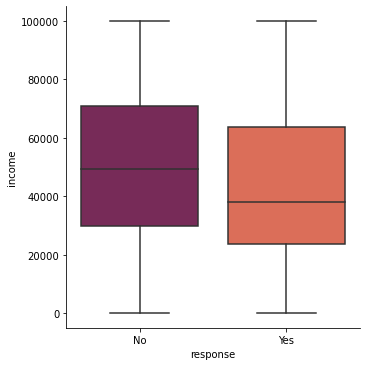

In [29]:
#plot

sns.catplot(x = 'response', y = 'income', data = r_income, kind = "box", palette = "rocket")

<AxesSubplot:>

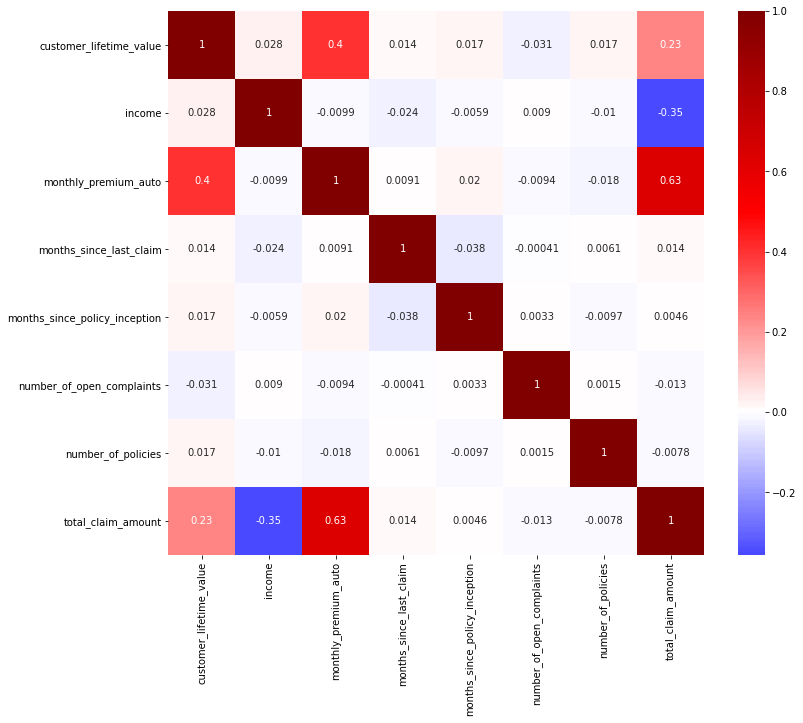

In [30]:
#Correlation heatmap

fig,ax = plt.subplots(figsize=(12,10))
sns.heatmap(cs_df.corr(),annot=True, ax=ax, cmap="seismic", center=0)